<a href="https://colab.research.google.com/github/oumayra/Git_course/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np



In [30]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

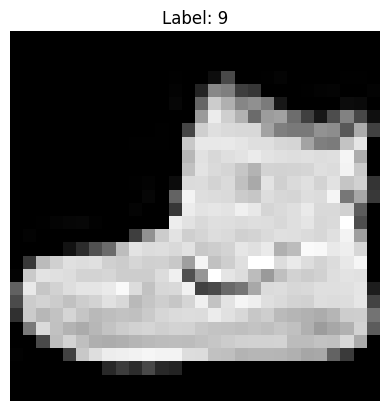

In [31]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')


In [32]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [33]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [34]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [35]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.2
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.7589 - loss: 0.6605 - val_accuracy: 0.8772 - val_loss: 0.3396
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.8780 - loss: 0.3303 - val_accuracy: 0.8942 - val_loss: 0.3002
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9018 - loss: 0.2754 - val_accuracy: 0.8940 - val_loss: 0.2837
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9137 - loss: 0.2384 - val_accuracy: 0.9027 - val_loss: 0.2691
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9234 - loss: 0.2047 - val_accuracy: 0.8975 - val_loss: 0.2853


In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy sur le test :", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8919 - loss: 0.3153
Accuracy sur le test : 0.8932999968528748


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

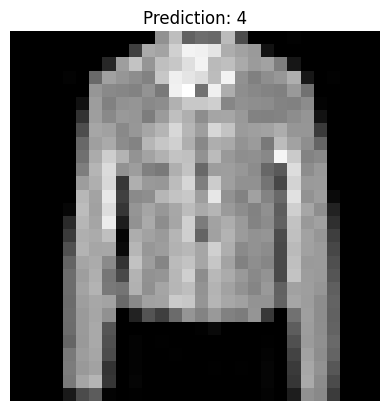

In [37]:
predictions = model.predict(x_test)

index = 10
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Prediction: {np.argmax(predictions[index])}")
plt.axis('off')
